###  데이터 사이언스 가설 검증: 서울시 범죄현황 분석
- 서울 강남 3구 안전한지 확인하는 것
    - 1. pivot을 활용하여 raw data 가공

In [55]:
from matplotlib import font_manager
from matplotlib import rc

f_path = "C://Windows/Fonts/malgun.ttf"
f_name = font_manager.FontProperties(fname=f_path).get_name()

rc('font', family=f_name)

In [22]:
import numpy as np
import pandas as pd

In [23]:
crime_raw_data = pd.read_csv('datas/seoul_crime/2017년.csv', encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173


In [24]:
# null 있는지 확인
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [25]:
# raw data를 pivot을 활용해 구분을 기준으로 데이터 재배치
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=[np.sum]
)
    # crime_station 
crime_station.head()

sum                                             
       건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152

In [26]:
crime_station.columns

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [27]:
crime_station.columns = crime_station.columns.droplevel([0,1])
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [28]:
crime_station['강도', '검거'].head()

구분
강남    16
강동    12
강북     5
강서     6
관악     6
Name: (강도, 검거), dtype: int64

In [29]:
tmp= crime_station.columns.get_level_values(0) +crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [30]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


In [31]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [32]:
station_names =['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names=['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
    if idx in station_names:
        tmp_gu.append(gu_names[station_names.index(idx)])
    else:
        tmp_gu.append(idx+'구')

In [33]:
crime_station['구'] = tmp_gu
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,강서구
관악,323,379,6,7,7,8,1152,1979,2666,3152,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,금천구
남대문,62,94,3,3,0,1,400,785,780,863,중구


In [34]:
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [35]:
crime_gu['살인발생'].sort_values(ascending=False).head()

구
영등포구    15
강서구     11
동대문구    11
서초구      9
강북구      8
Name: 살인발생, dtype: int64

In [36]:
crime_gu['폭력발생'].sort_values(ascending=False).head()

구
강남구     3956
영등포구    3190
관악구     3152
송파구     3007
강서구     2916
Name: 폭력발생, dtype: int64

In [37]:
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [38]:
crime_gu['강도검거']/ crime_gu['강도발생']

구
강남구     1.200000
강동구     1.200000
강북구     0.714286
강서구     1.500000
관악구     0.857143
광진구     0.615385
구로구     0.750000
금천구     1.000000
노원구     0.777778
도봉구     1.000000
동대문구    1.666667
동작구     1.285714
마포구     1.000000
서대문구    2.000000
서초구     0.538462
성동구     1.000000
성북구     1.000000
송파구     3.000000
양천구     0.666667
영등포구    1.000000
용산구     0.800000
은평구     1.000000
종로구     0.800000
중구      1.000000
중랑구     1.333333
dtype: float64

In [39]:
crime_gu[['강도검거', '살인검거']].div(crime_gu['강도발생'], axis=0)

,강도검거,살인검거
구,,
강남구,1.200000,0.350000
강동구,1.200000,0.600000
강북구,0.714286,1.142857
강서구,1.500000,2.750000
관악구,0.857143,1.000000
광진구,0.615385,0.384615
구로구,0.750000,1.000000
금천구,1.000000,1.000000
노원구,0.777778,0.444444


In [40]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[num].div(crime_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.817133,1.200000,1.000000,0.441853,0.862235
강동구,0.982558,1.200000,1.200000,0.576900,0.868259
강북구,0.735577,0.714286,1.000000,0.626233,0.938312
강서구,0.800633,1.500000,1.000000,0.589513,0.872428
관악구,0.852243,0.857143,0.875000,0.582112,0.845812
광진구,0.796935,0.615385,0.833333,0.526126,0.885368
구로구,0.551829,0.750000,1.142857,0.503768,0.829148
금천구,0.883333,1.000000,1.000000,0.590710,0.894344
노원구,0.861111,0.777778,1.000000,0.492198,0.857143


In [41]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[target]= crime_gu[num].div(crime_gu[den].values)*100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,169,172,12,10,6,5,949,1645,2109,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,153,208,5,7,8,8,635,1014,2023,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [42]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [43]:
crime_gu[target] > 100

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,True,False,False,False
강동구,False,True,True,False,False
강북구,False,False,False,False,False
강서구,False,True,False,False,False
관악구,False,False,False,False,False
광진구,False,False,False,False,False
구로구,False,False,True,False,False
금천구,False,False,False,False,False
노원구,False,False,False,False,False


In [44]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.000000,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.000000,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.000000,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.000000,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.500000,58.211218,84.581218
광진구,261,13,6,2220,2146,79.693487,61.538462,83.333333,52.612613,88.536813
구로구,328,8,7,1725,2827,55.182927,75.000000,100.000000,50.376812,82.914751
금천구,240,5,5,1141,1874,88.333333,100.000000,100.000000,59.070990,89.434365
노원구,180,9,4,1538,2478,86.111111,77.777778,100.000000,49.219766,85.714286


In [45]:
crime_gu.rename(columns = {'강간발생':'강간', '강도발생':'강도', '살인발생':'살인', '절도발생':'절도', 
                           '폭력발생':'폭력'}, inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [46]:
col=['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm = crime_gu[col]/crime_gu[col].max()
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000
강동구,0.333333,0.50,0.283361,0.525559,0.614004
강북구,0.533333,0.35,0.342669,0.323962,0.544995
강서구,0.733333,0.20,0.520593,0.603195,0.737108
관악구,0.533333,0.35,0.624382,0.632268,0.796764


In [47]:
col2=['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,100.0,100.000000,81.713344,44.185304,86.223458
강동구,0.333333,0.50,0.283361,0.525559,0.614004,100.0,100.000000,98.255814,57.689970,86.825854
강북구,0.533333,0.35,0.342669,0.323962,0.544995,100.0,71.428571,73.557692,62.623274,93.831169
강서구,0.733333,0.20,0.520593,0.603195,0.737108,100.0,100.000000,80.063291,58.951271,87.242798
관악구,0.533333,0.35,0.624382,0.632268,0.796764,87.5,85.714286,85.224274,58.211218,84.581218


In [48]:
col=['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,100.0,100.000000,81.713344,44.185304,86.223458,0.893333
강동구,0.333333,0.50,0.283361,0.525559,0.614004,100.0,100.000000,98.255814,57.689970,86.825854,0.451251
강북구,0.533333,0.35,0.342669,0.323962,0.544995,100.0,71.428571,73.557692,62.623274,93.831169,0.418992
강서구,0.733333,0.20,0.520593,0.603195,0.737108,100.0,100.000000,80.063291,58.951271,87.242798,0.558846
관악구,0.533333,0.35,0.624382,0.632268,0.796764,87.5,85.714286,85.224274,58.211218,84.581218,0.587350


In [49]:
col2=['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col2], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,100.0,100.000000,81.713344,44.185304,86.223458,0.893333,82.424421
강동구,0.333333,0.50,0.283361,0.525559,0.614004,100.0,100.000000,98.255814,57.689970,86.825854,0.451251,88.554328
강북구,0.533333,0.35,0.342669,0.323962,0.544995,100.0,71.428571,73.557692,62.623274,93.831169,0.418992,80.288141
강서구,0.733333,0.20,0.520593,0.603195,0.737108,100.0,100.000000,80.063291,58.951271,87.242798,0.558846,85.251472
관악구,0.533333,0.35,0.624382,0.632268,0.796764,87.5,85.714286,85.224274,58.211218,84.581218,0.587350,80.246199


In [50]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구     0.893333
영등포구    0.708412
서초구     0.642180
관악구     0.587350
강서구     0.558846
Name: 범죄, dtype: float64

In [51]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
도봉구     90.917804
은평구     90.163414
강동구     88.554328
동대문구    88.003169
금천구     87.367738
Name: 검거, dtype: float64

### seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(0,14,100)
y1=np.sin(x)
y2= 2*np.sin(x+0.5)
y3= 3*np.sin(x+1.0)
y4= 4*np.sin(x+1.5)

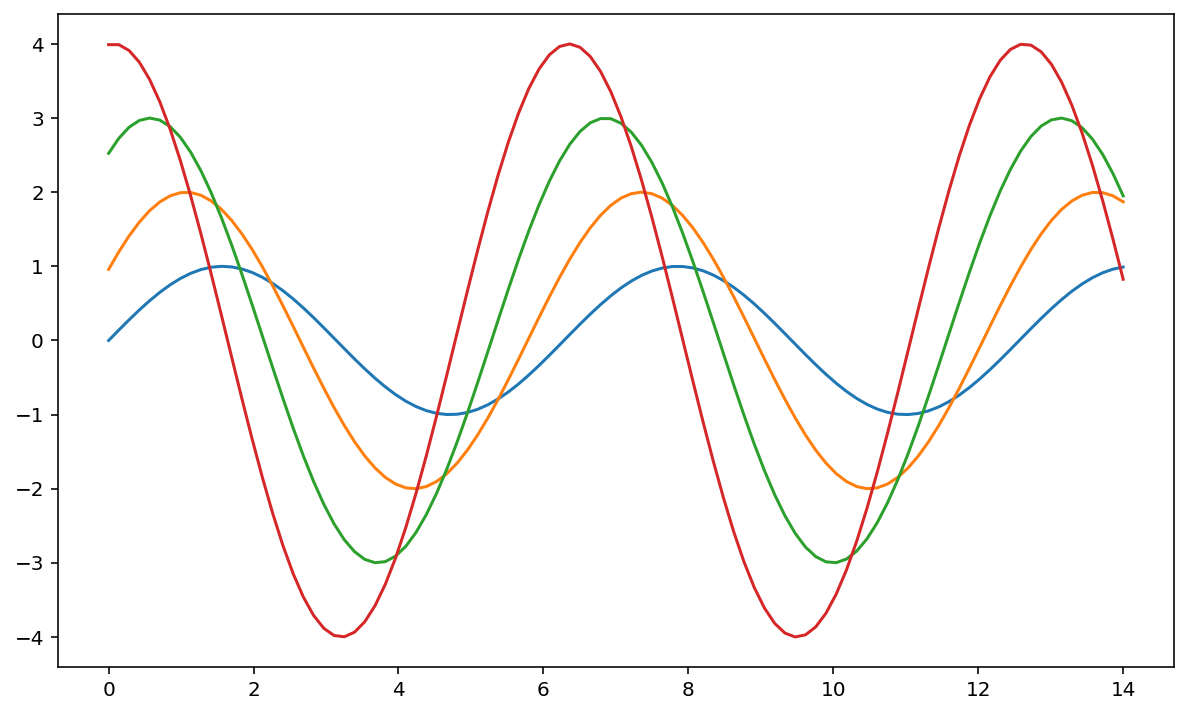

In [2]:
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

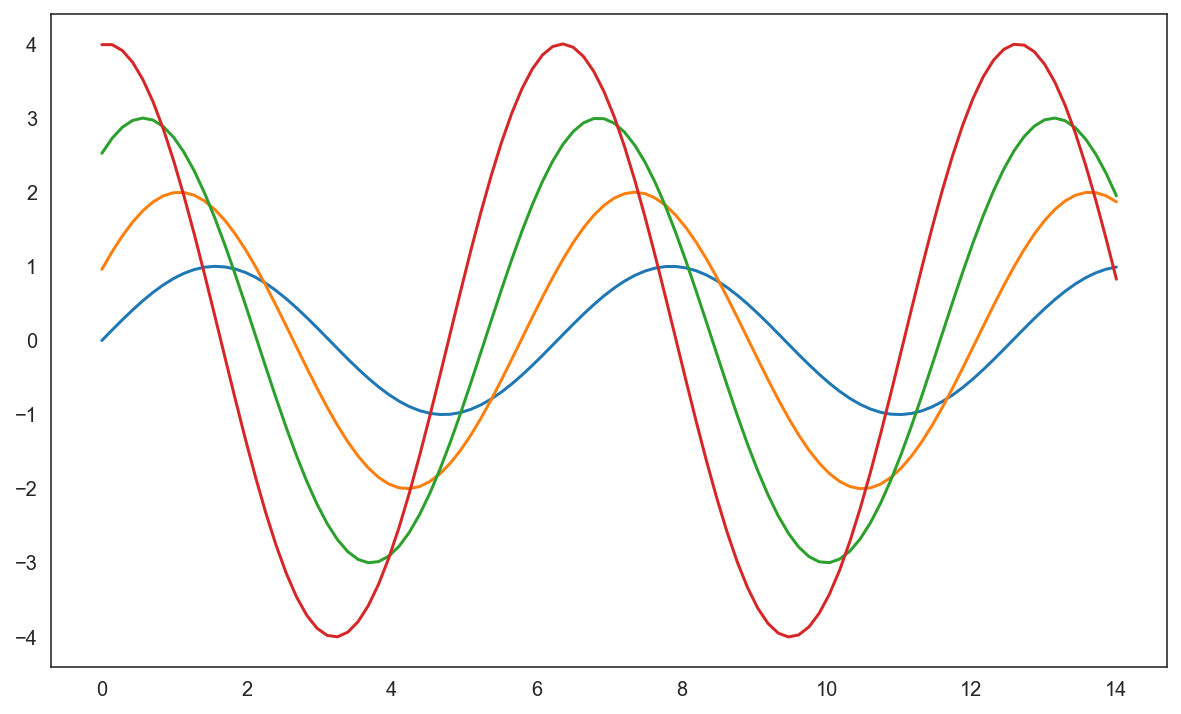

In [3]:
sns.set_style("white")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

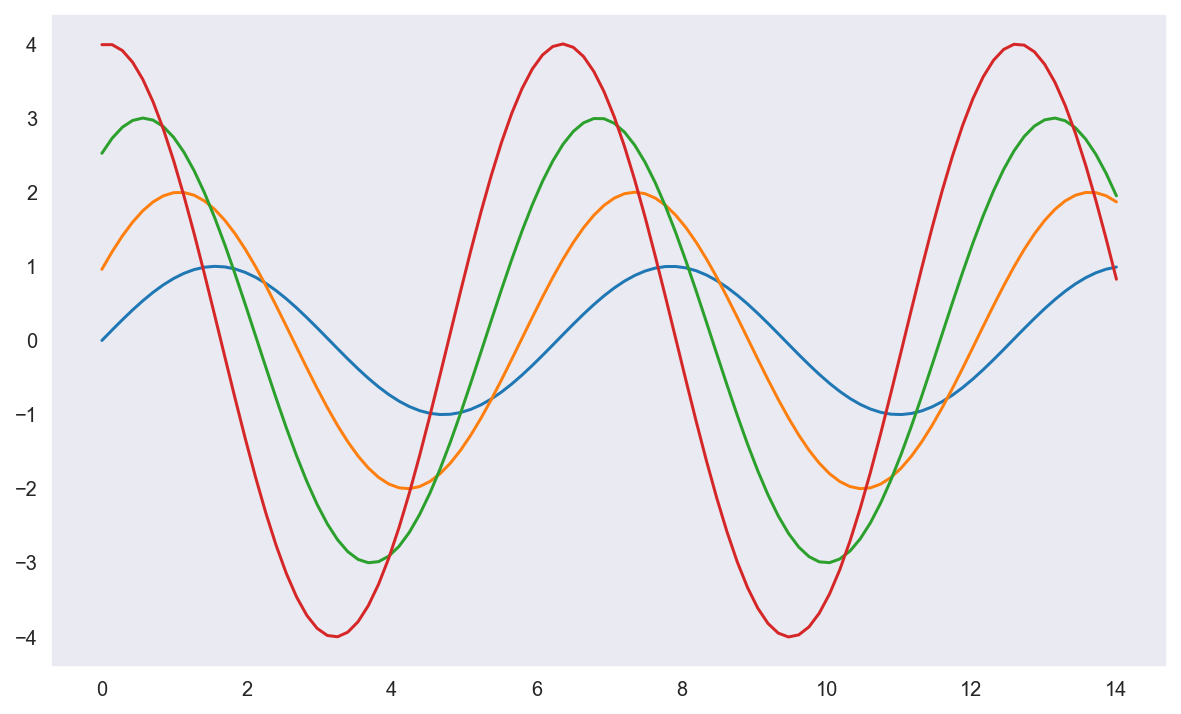

In [4]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

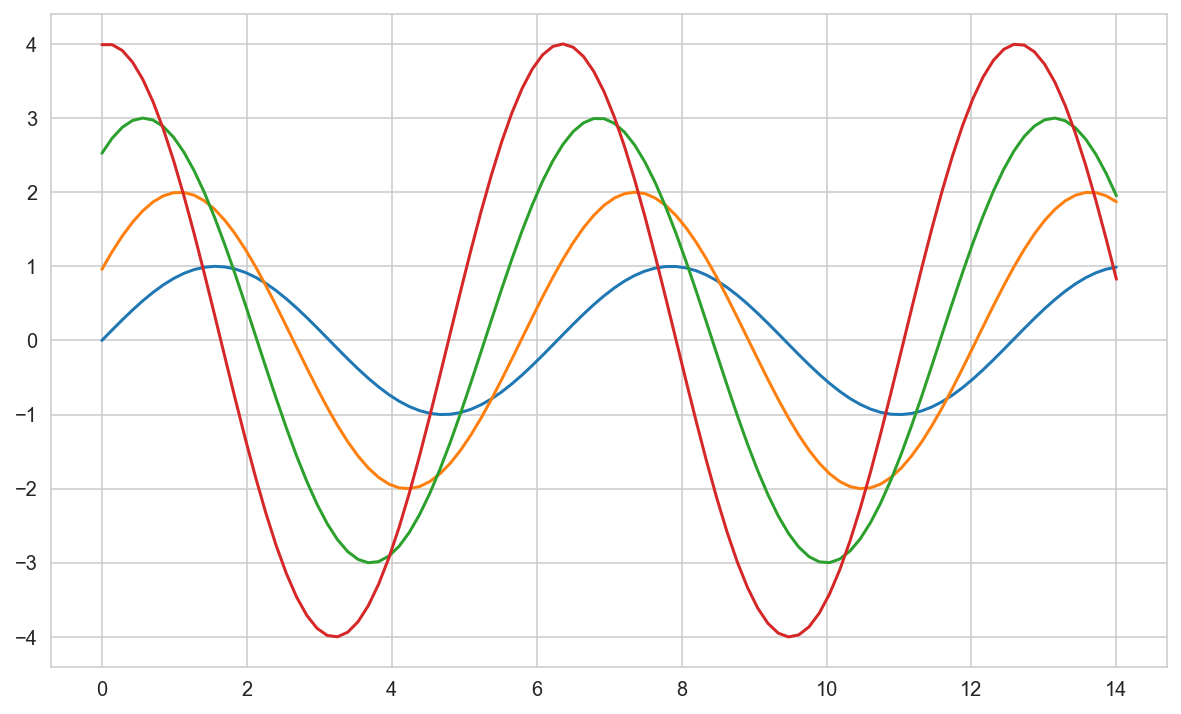

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

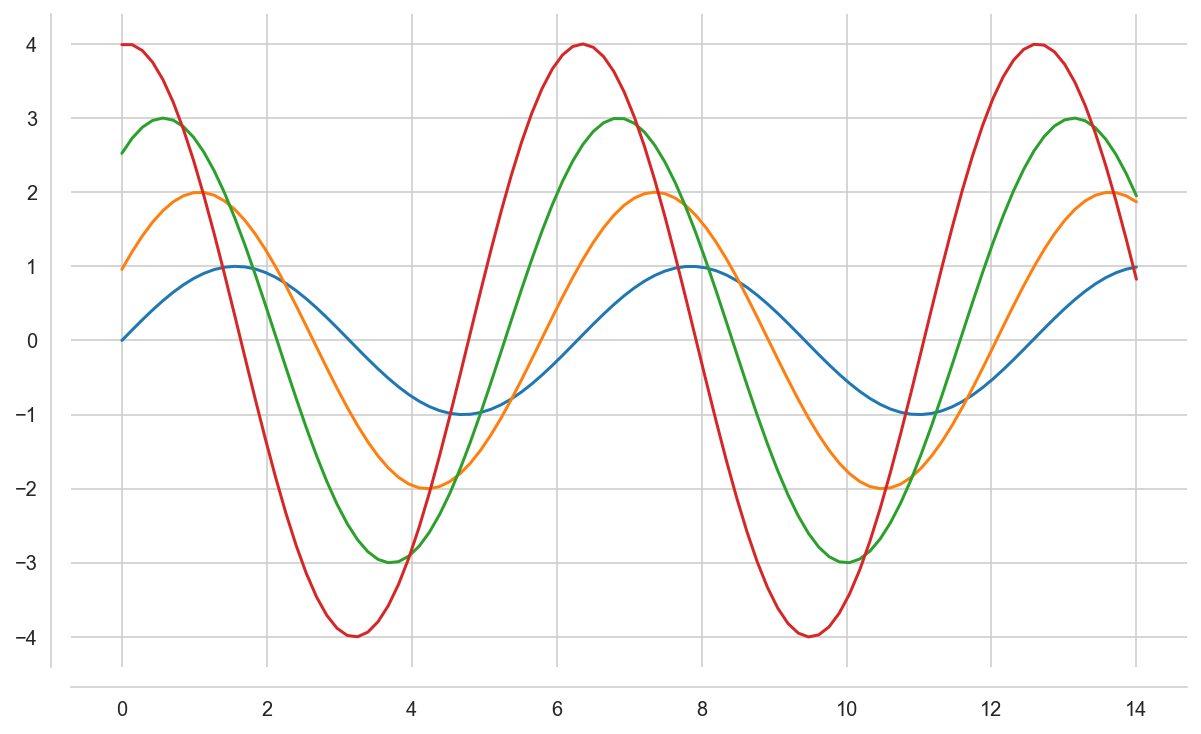

In [6]:

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
sns.despine(offset=10)
plt.show()

In [7]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


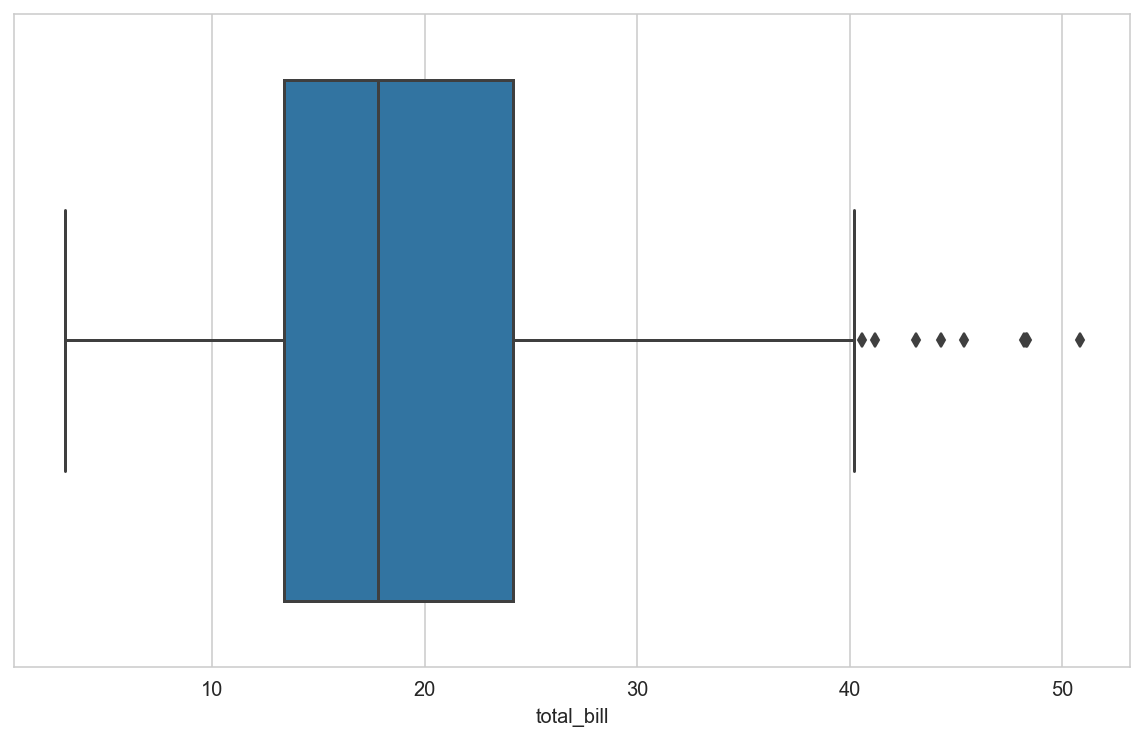

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=tips['total_bill'])
plt.show()

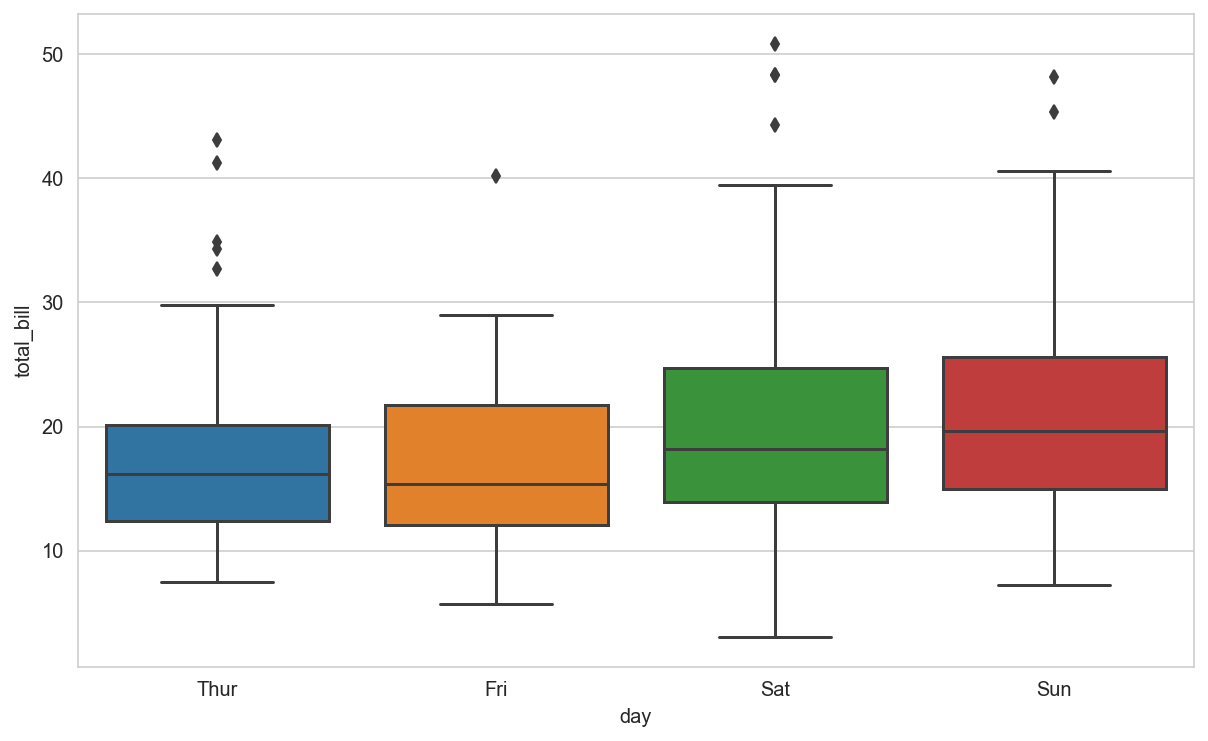

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="day", y="total_bill", data= tips)
plt.show()

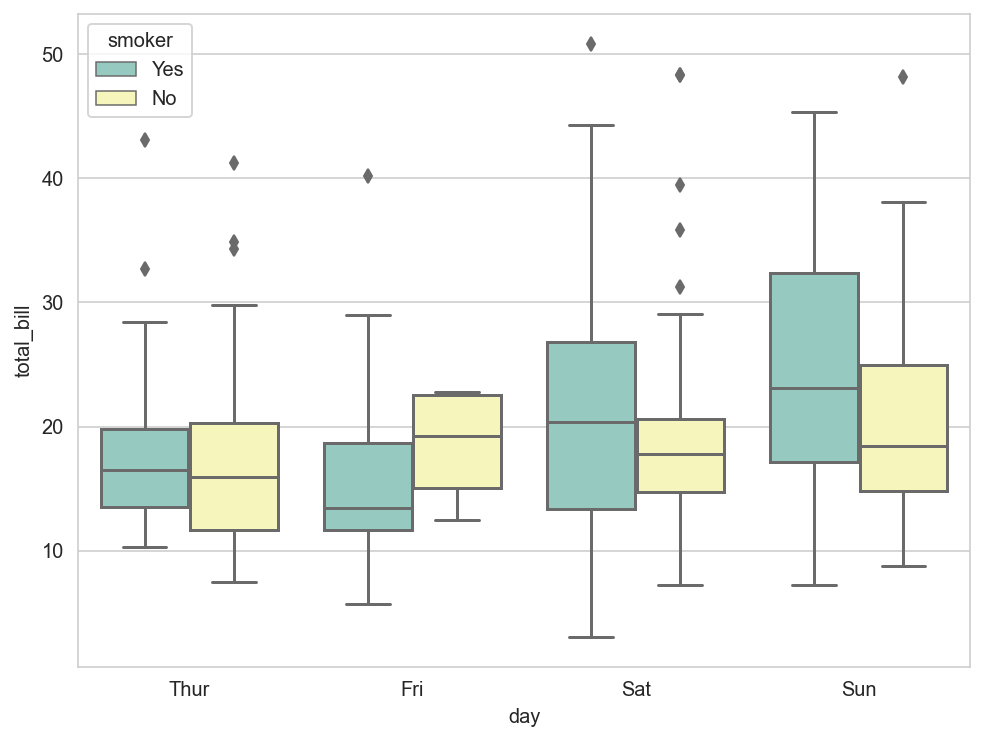

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data= tips, palette="Set3")
plt.show()

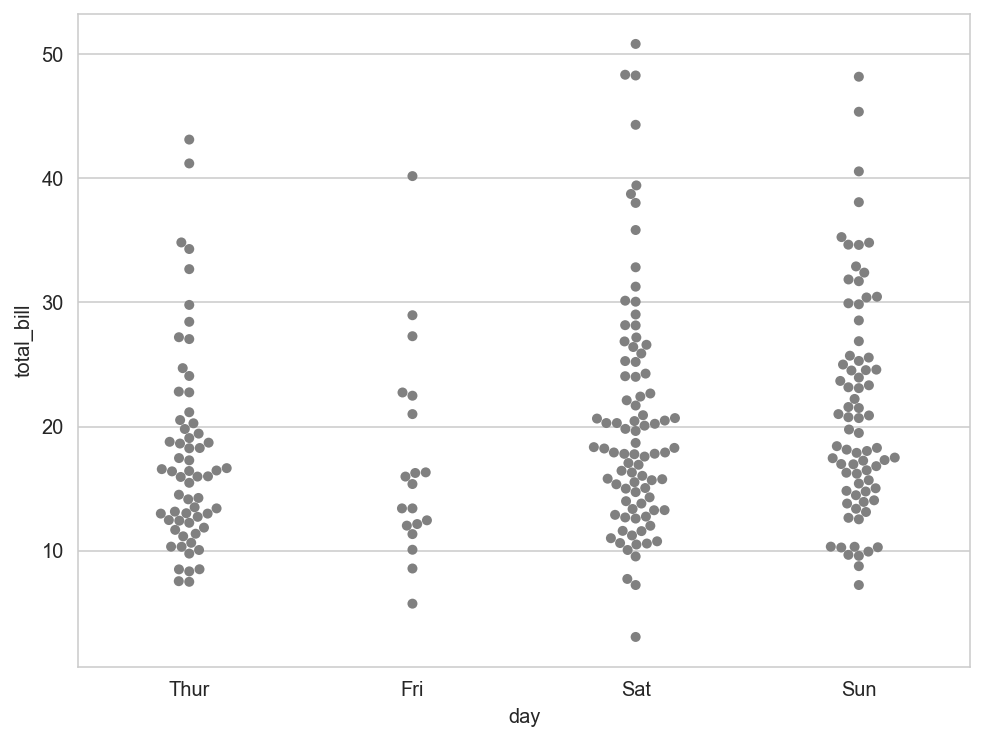

In [11]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="day", y="total_bill", data= tips, color=".5")
plt.show()

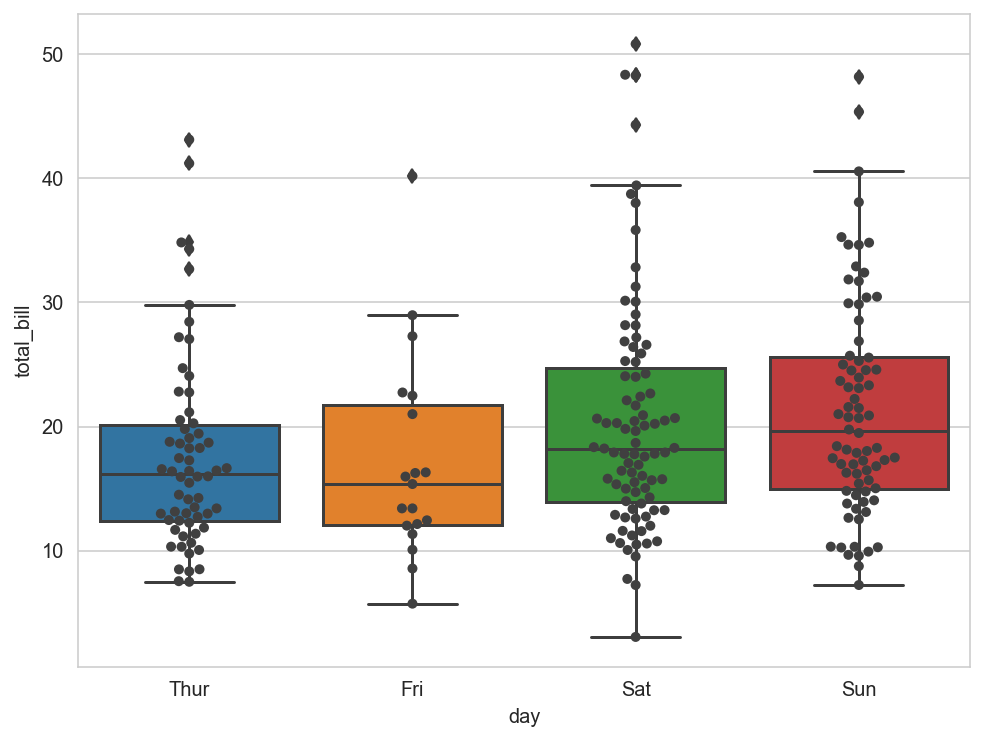

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data= tips)
sns.swarmplot(x="day", y="total_bill", data= tips, color=".25")
plt.show()

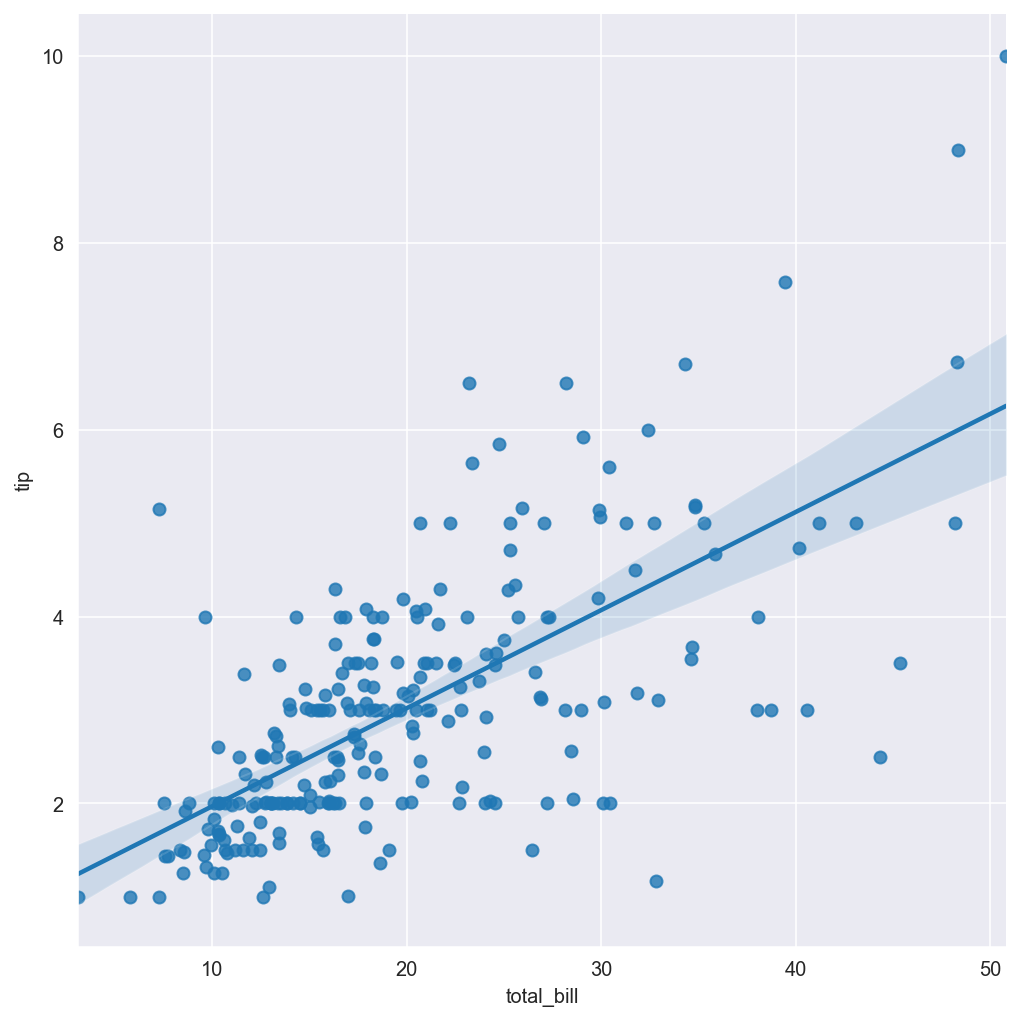

In [13]:
sns.set_style("darkgrid")
sns.lmplot(x='total_bill', y='tip', data=tips, height=7)
plt.show()

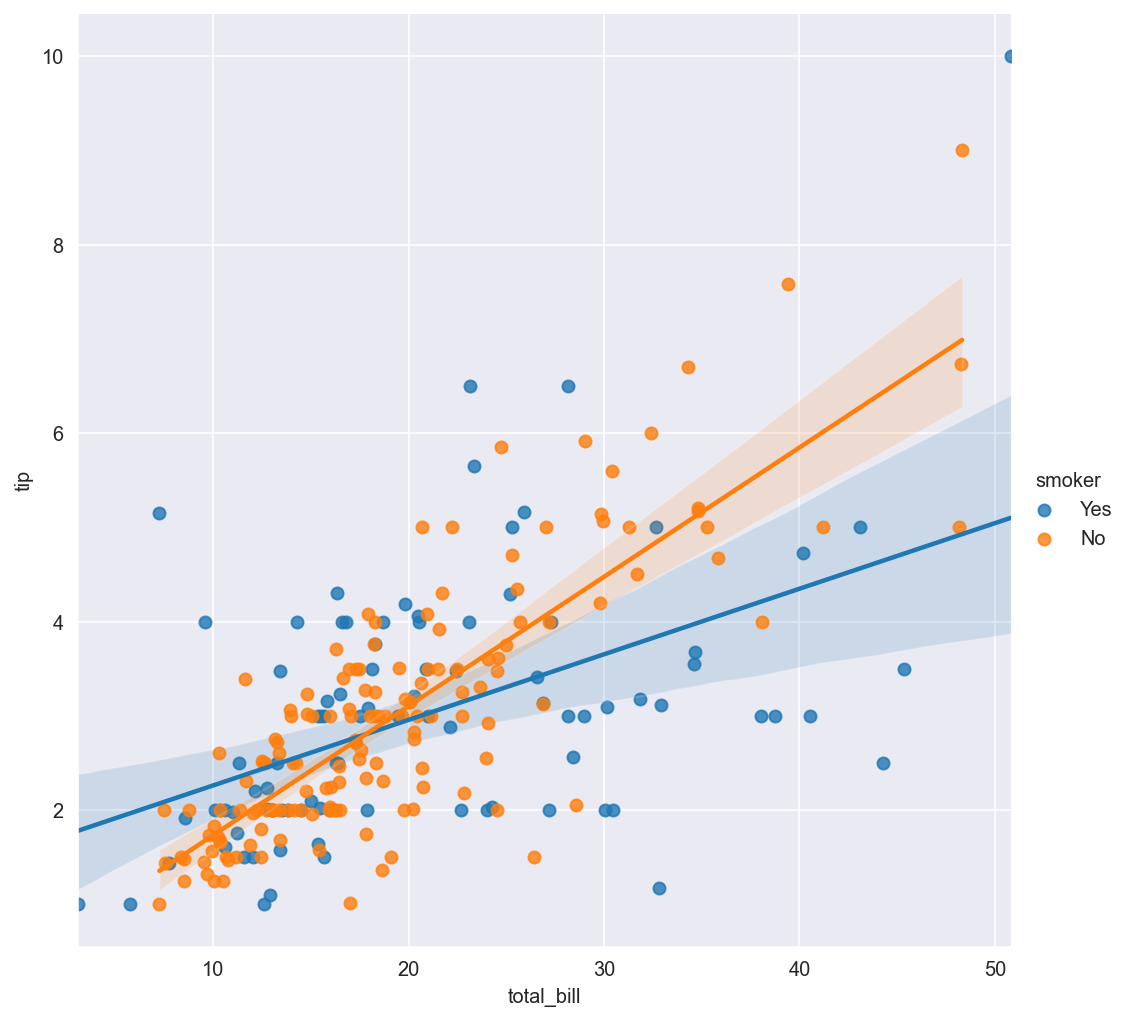

In [14]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data= tips, height=7)
plt.show()

In [15]:
flights = sns.load_dataset('flights')
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [16]:
flights = flights.pivot('month', 'year', 'passengers')
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


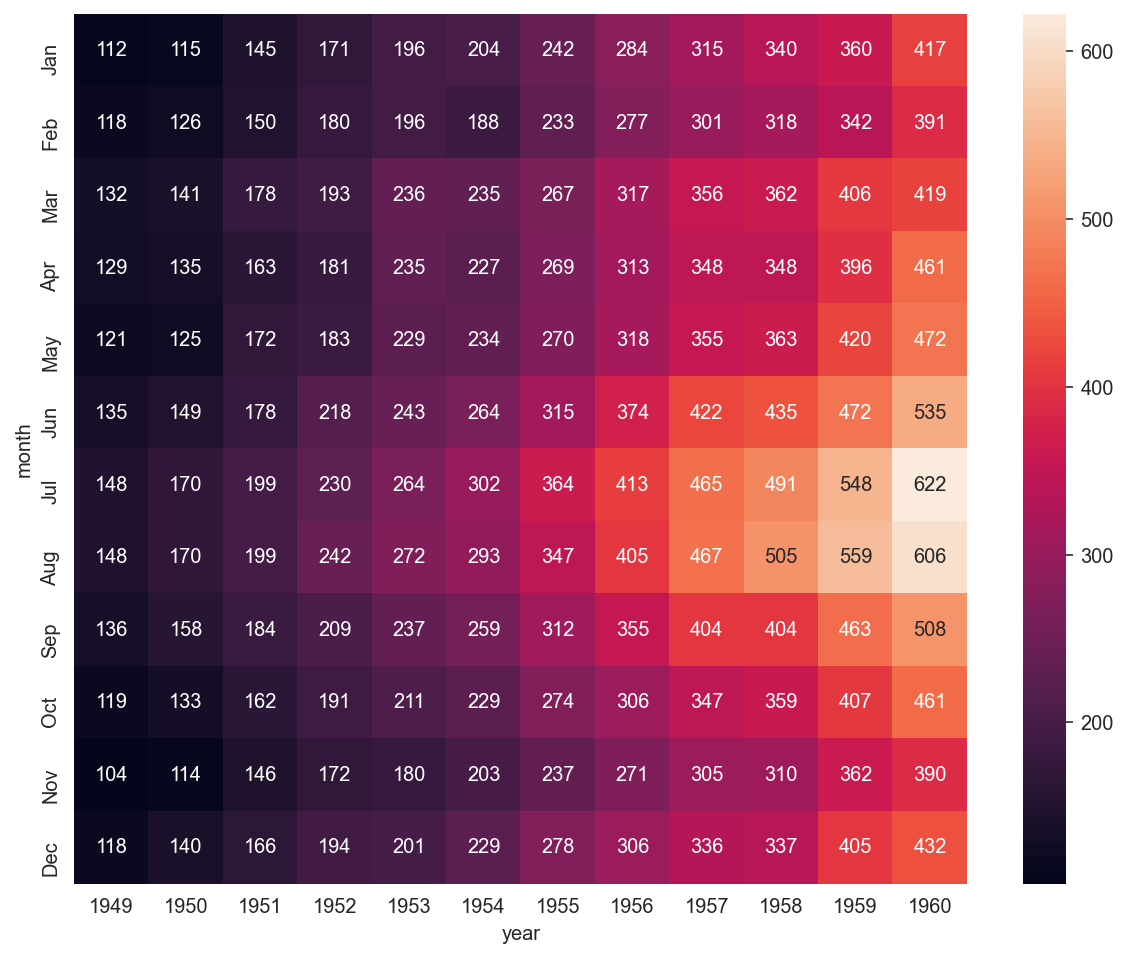

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d')
plt.show()

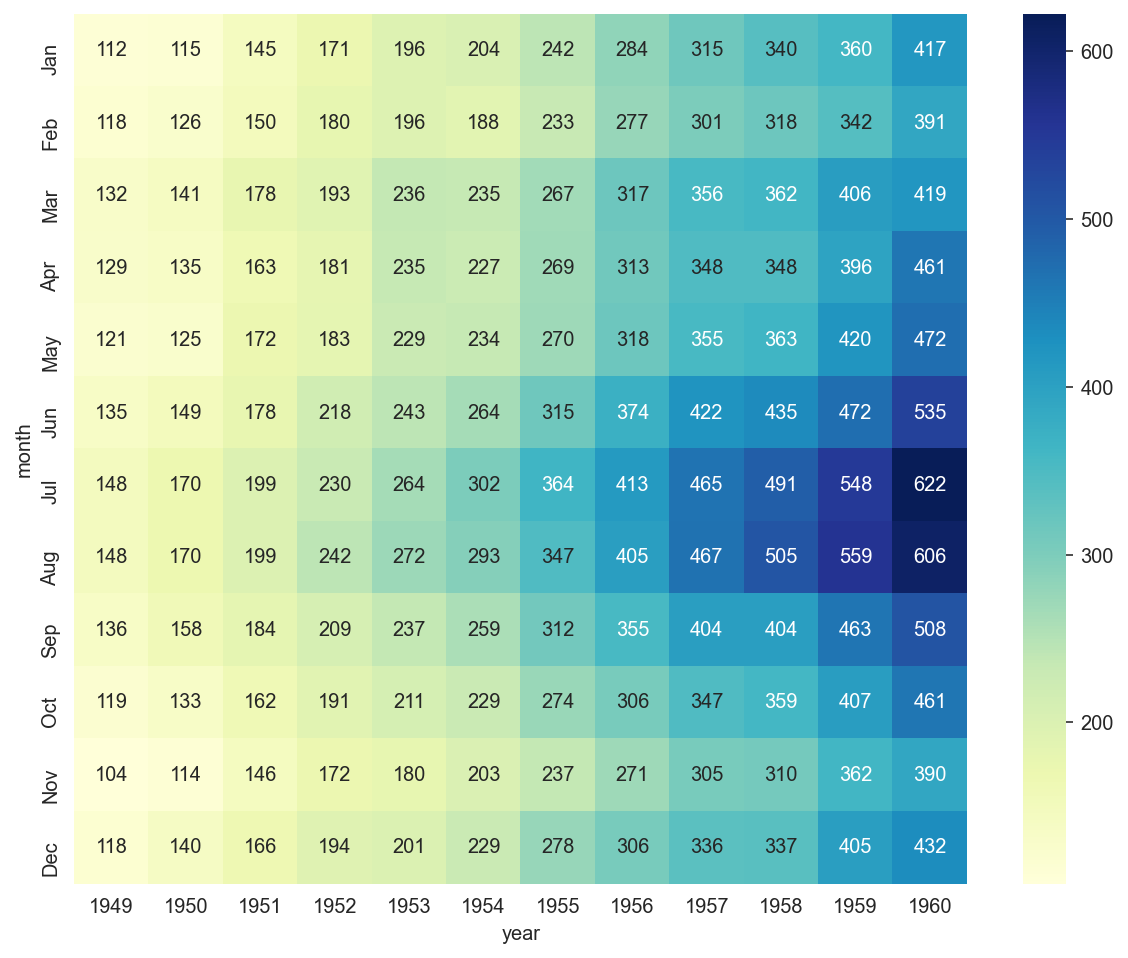

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [19]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


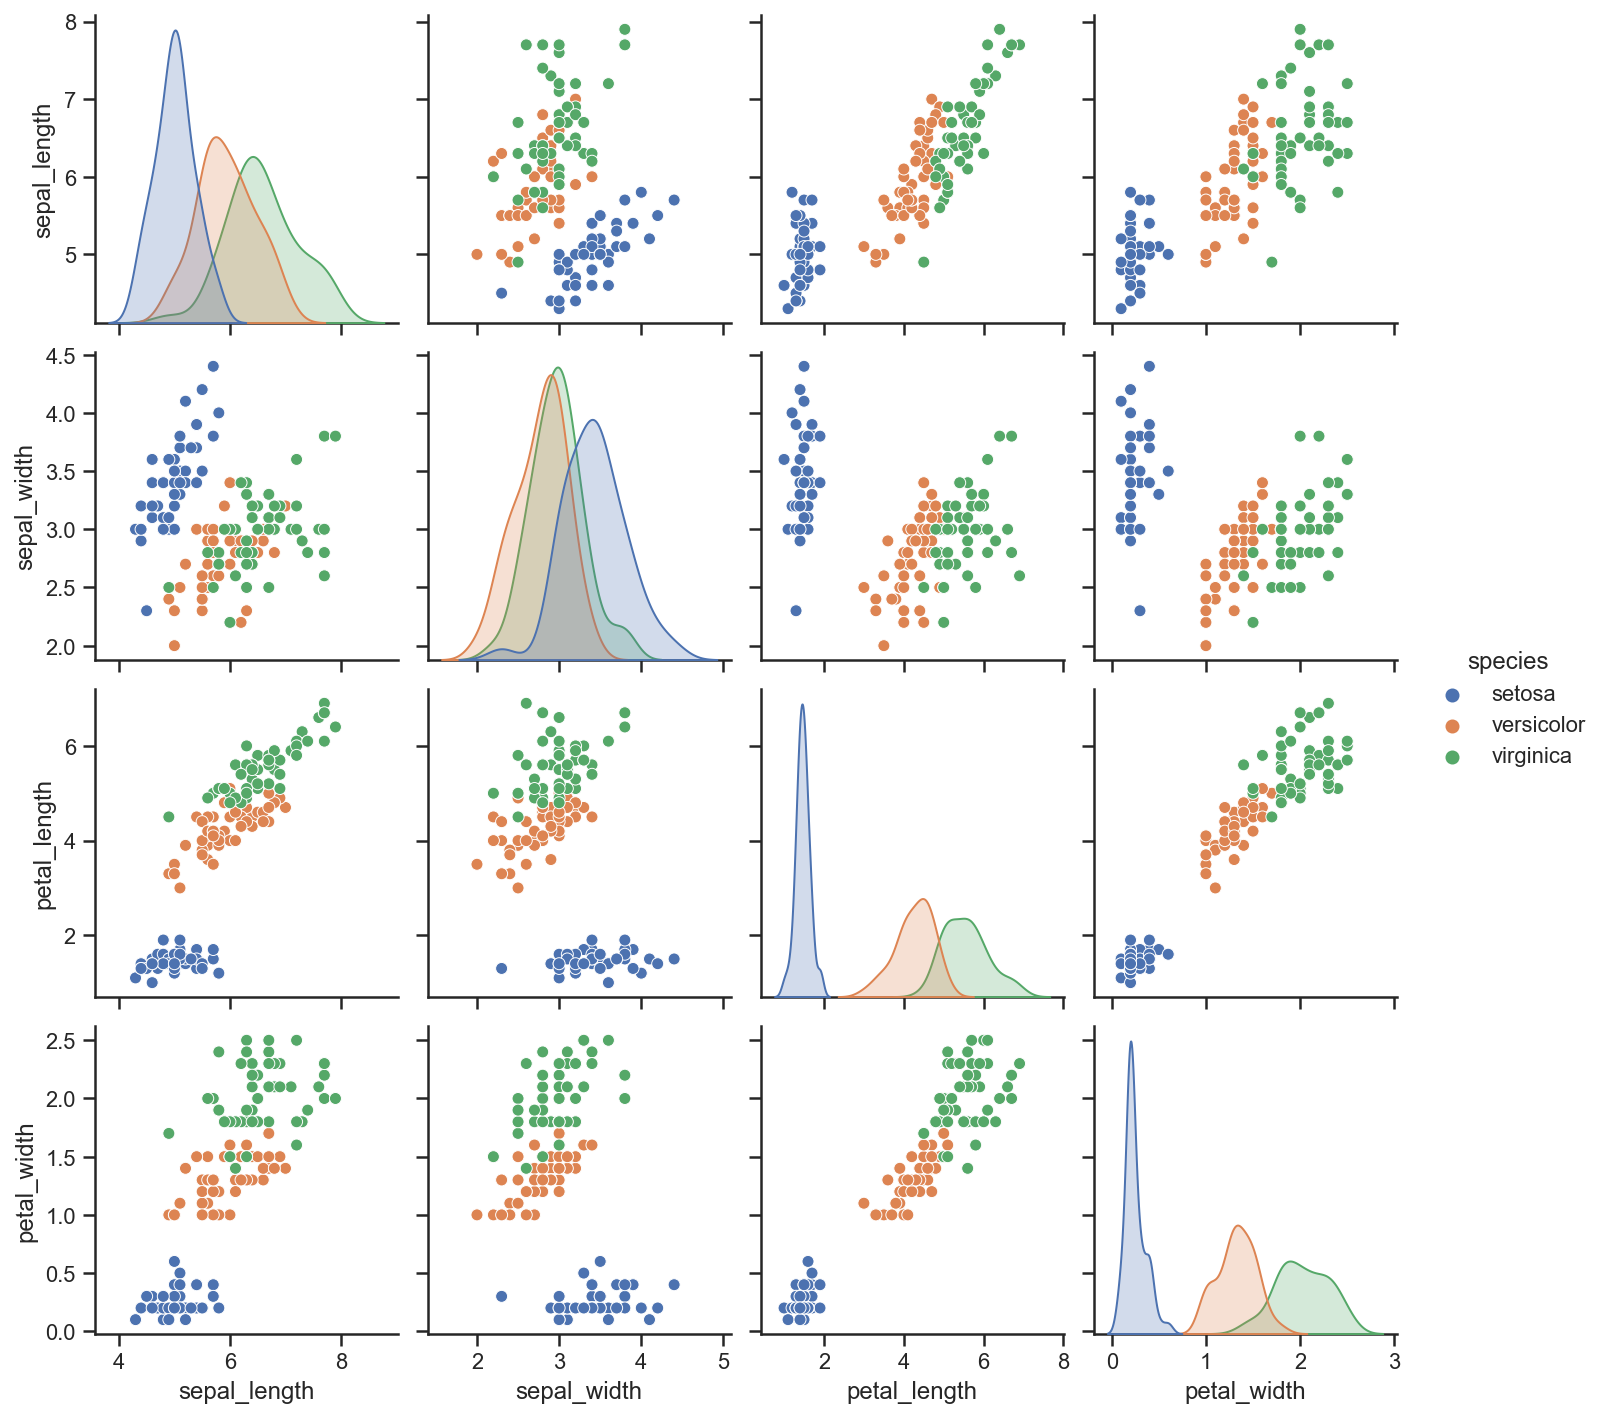

In [20]:
sns.pairplot(iris, hue='species')
plt.show()

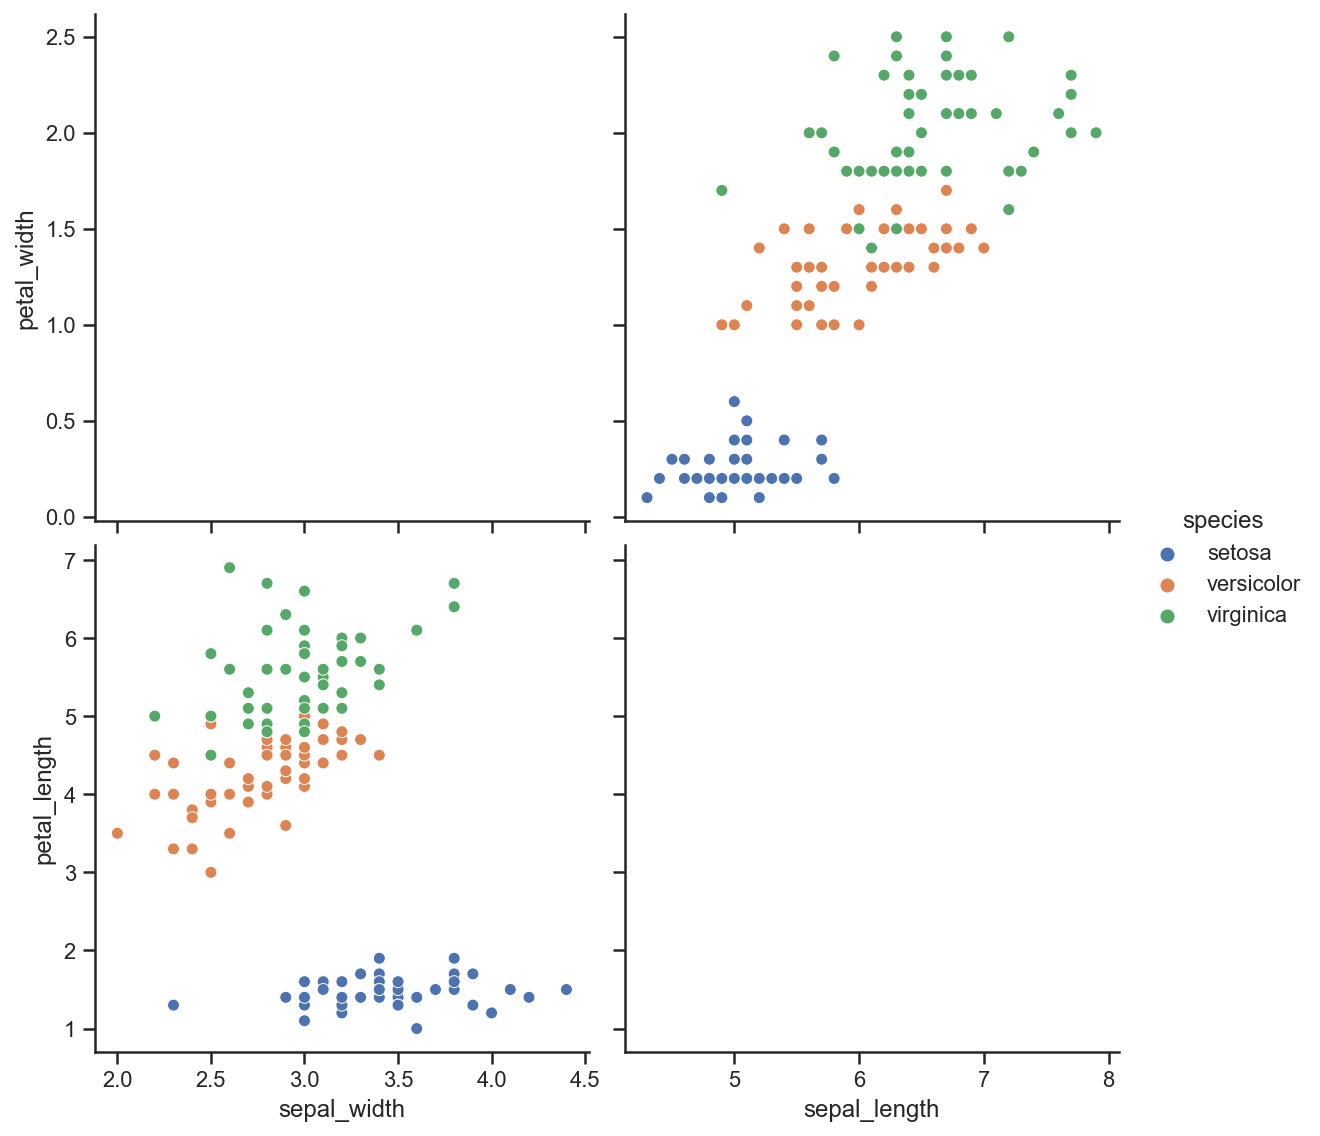

In [21]:
sns.pairplot(iris, x_vars=["sepal_width", 'sepal_length'],
            y_vars=['petal_width', 'petal_length'],
            hue='species', height=4)
plt.show()

### 서울 범죄 데이터에 적용

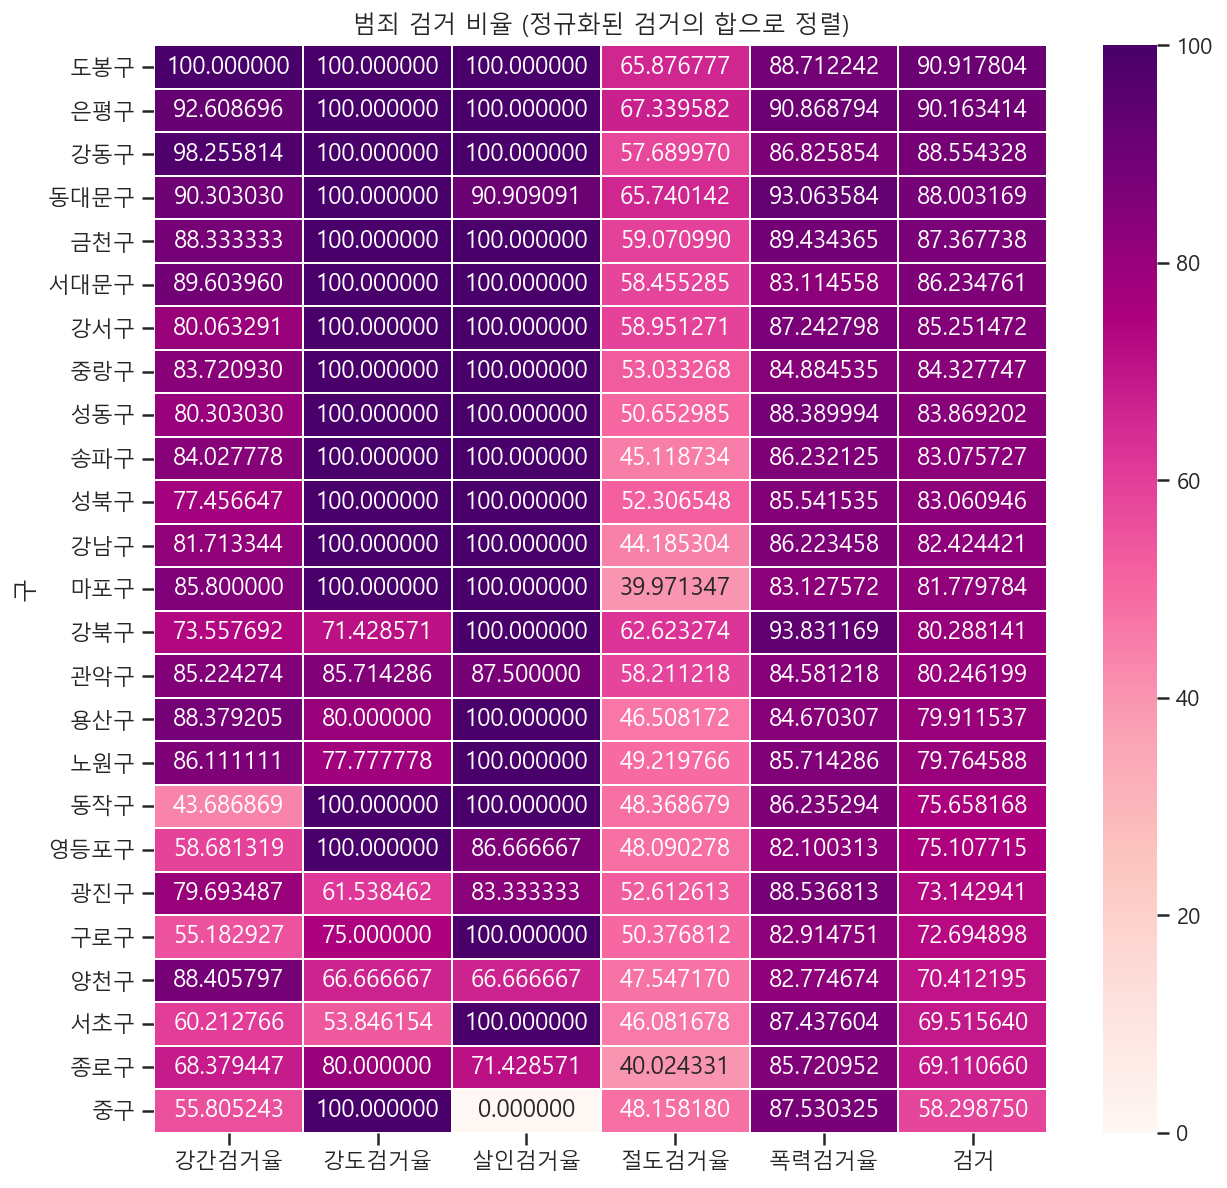

In [56]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']
crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending = False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

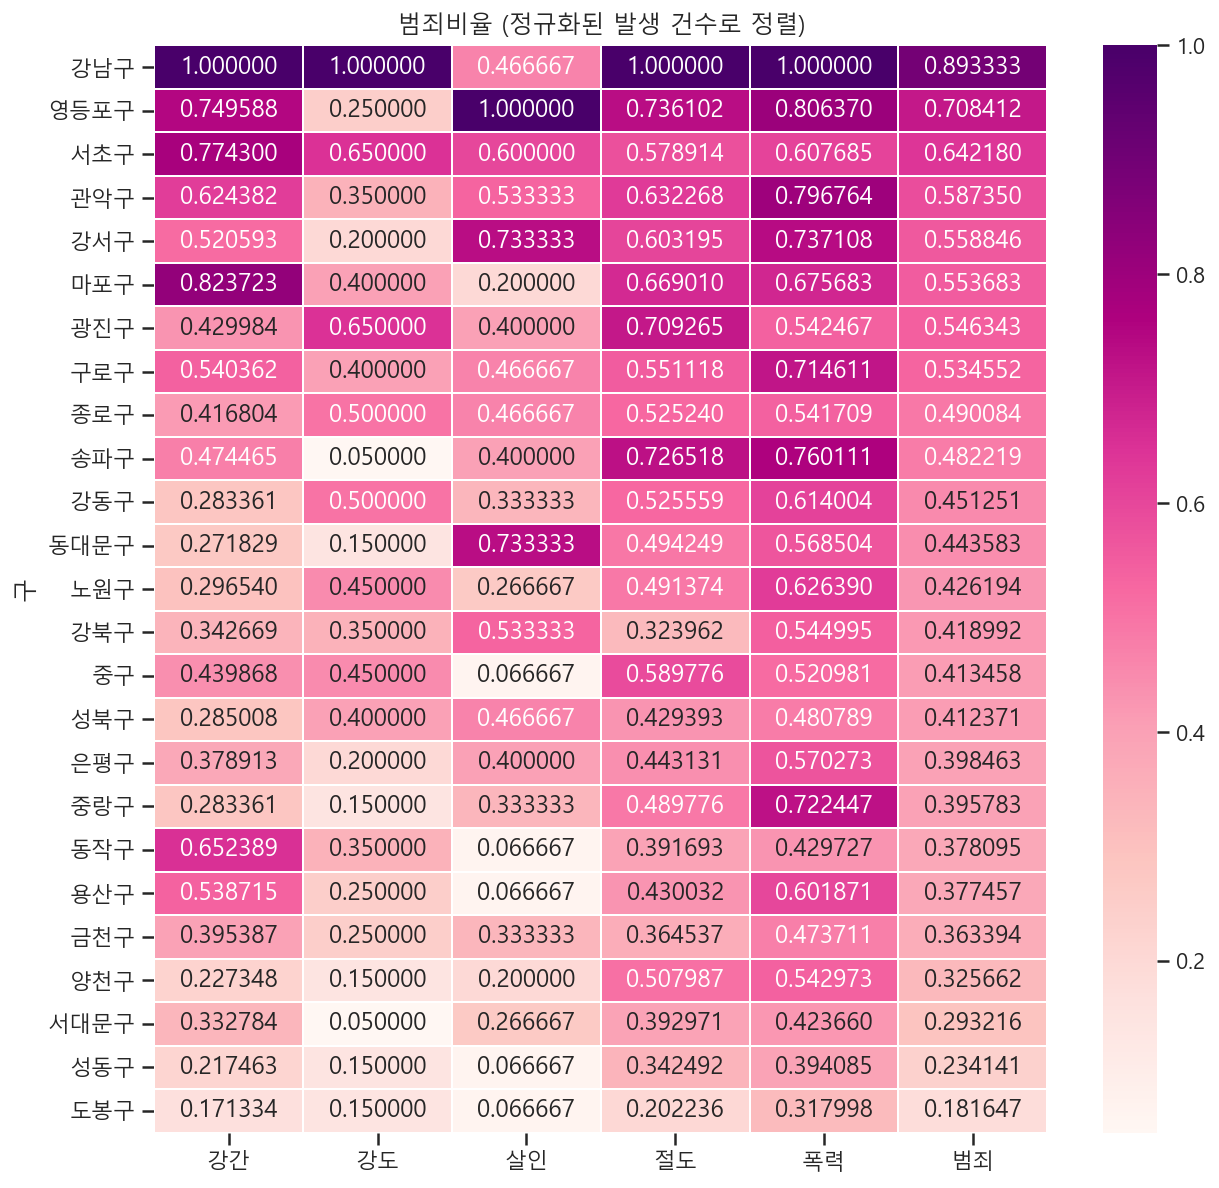

In [57]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']
crime_gu_norm_sort = crime_gu_norm.sort_values(by='범죄', ascending = False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [58]:
crime_gu.to_csv('datas/seoul_crime/seoul_crime_result.csv', sep=',', encoding='UTF-8')